# Mount data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import chdir
chdir("/content/drive/My Drive/raw_data")

# Install dependencies

In [ ]:
!pip install bs4

In [ ]:
import pandas as pd
import numpy as np
import nltk
import pickle
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer
# from zeugma.embeddings import EmbeddingTransformer
import spacy
from spacy import displacy
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.base import TransformerMixin, BaseEstimator

# Load Data

In [ ]:
tm_feats = pd.read_csv('/content/drive/MyDrive/topicmodellingfeatures.csv')

In [ ]:
tm_feats.iloc[: , -6:].head()

,prob_topic_1,prob_topic_2,prob_topic_3,prob_topic_4,prob_topic_5,prob_topic_6
0,0.020674,0.000154,0.085877,0.892988,0.000154,0.000154
1,0.035763,0.000238,0.000238,0.904185,0.059339,0.000238
2,0.176217,0.038097,0.124859,0.518177,0.124836,0.017814
3,0.256079,0.127486,0.000034,0.484533,0.000034,0.131833
4,0.000169,0.000169,0.180893,0.818430,0.000169,0.000169


In [ ]:
train = pd.read_csv('fulltrain.csv', header=None)
X_train = train[1]
y_train = train[0]

In [ ]:
len(train)

48854

In [ ]:
train.head()

,0,1
0,1,"A little less than a decade ago, hockey fans w..."
1,1,The writers of the HBO series The Sopranos too...
2,1,Despite claims from the TV news outlet to offe...
3,1,After receiving 'subpar' service and experienc...
4,1,After watching his beloved Seattle Mariners pr...


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Preprocessing pipeline

In [ ]:
sw=stopwords.words("english")
top_k_features=1000

In [ ]:
model = Pipeline([
    ('count vectorizer',CountVectorizer(lowercase=True, ngram_range=(1,2))), # Count
    ('chi2score',SelectKBest(chi2,k=top_k_features)),
    # ('tf_transformer',TfidfTransformer(use_idf=True)), #TF-IDF
    # ('glove',EmbeddingTransformer('glove')), # Embedding
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('count vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('chi2score',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x7fb8a5238560>))])

In [ ]:
X = model.transform(X_train)

In [ ]:
X[0]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [ ]:
# with open('X_train_TFIDF.pkl', 'wb') as handle:
    # pickle.dump(X, handle)

# Class distribution

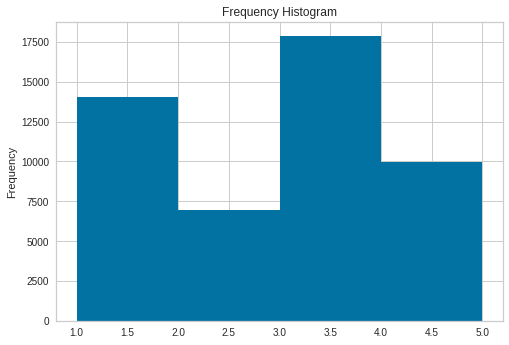

In [ ]:
# Compute frequency and bins
plt.hist(y_train, bins=[1,2,3,4,5])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

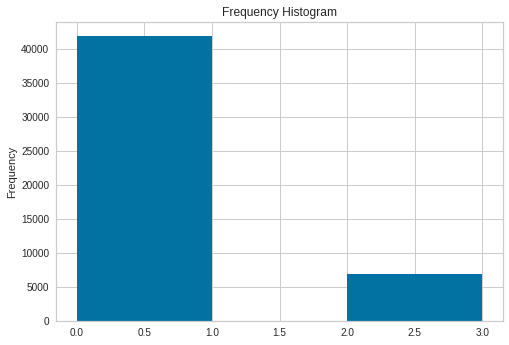

In [ ]:
# Compute frequency and bins
data = np.where(y_train!=2, 0, y_train)
plt.hist(data, bins=[0,1,2,3])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

# Visualize bigrams

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


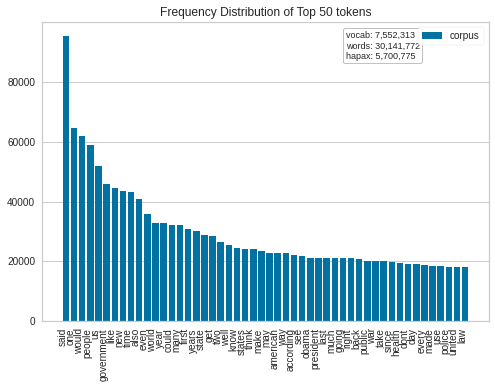

In [ ]:
vectorizer = CountVectorizer(stop_words=sw, lowercase=True, ngram_range=(1,2))
docs       = vectorizer.fit_transform(X_train)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v', n=50)
visualizer.fit(docs)
visualizer.show()

In [ ]:
train[:200]

,0,1
0,1,"A little less than a decade ago, hockey fans w..."
1,1,The writers of the HBO series The Sopranos too...
2,1,Despite claims from the TV news outlet to offe...
3,1,After receiving 'subpar' service and experienc...
4,1,After watching his beloved Seattle Mariners pr...
...,...,...
195,1,In spite of his distaste for Annie's Homegrown...
196,1,"PHILADELPHIA8-year-old Easton, PA Little Leagu..."
197,1,As civilian casualties continue to mount amid ...
198,1,An estimated 80 billion tons of Jar Jar Binks-...


In [ ]:
print(X_train[2])

Despite claims from the TV news outlet to offer 'nonstop news' and 'coverage you can count on,' an selfnews investigation has uncovered hundreds of instances in which KAMR Channel 4 10 OClock Eyewitness News team relied almost exclusively on news reports, weather forecasts, and even special-interest features already generated by the stations 6 OClock Eyewitness News team. The investigation found that 10 OClock News Team is in fact not the 'team you can trust.' In an examination of 98 consecutive prime-time and late-night broadcasts, including dozens more nationwide, the Amarillo-based stationthe regions self-styled 'News Leader'repeatedly ran pieces for its Health Beat, Pet Patrol, and Bargain Busters segments in both evening news slots, and regularly relayed the same weather updates and traffic reports up to 15 times a day. KAMR even routinely rehashed 6 p.m. footage for seemingly urgent 'breaking news' reports, most recently the Plum Creek Nursing Home power outage and the Bonham Mid

# Top-k

In [ ]:
values.reverse()

NameError: ignored

In [ ]:
# vocab=model.named_steps['count vectorizer'].vocabulary_
# feature_chi2=model.named_steps['chi2score'].scores_
# pairs=[(ngram,feature_chi2[vocab[ngram]]) for ngram in vocab.keys()]
# pairs.sort(key=lambda x:x[1])
# values=[pair[1] for pair in pairs]
# print(pairs[-100:])
values.reverse()
df = pd.DataFrame(values[0:2000], columns=['chi2'])
df.plot(kind='line')
plt.show()

# Remove html tags and expanding contractions

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
pip install contractions==0.0.18

In [ ]:
import contractions

In [ ]:
def remove_html(text_data):
  soup = BeautifulSoup(text_data, 'lxml')
  return soup.get_text()

def expand_contractions(s):
    text = contractions.fix(s)
    return text

text = X_train[2]

processed_text = remove_html(text)
processed_text = expand_contractions(text)
print(processed_text)

Despite claims from the TV news outlet to offer 'nonstop news' and 'coverage you can count on,' an selfnews investigation has uncovered hundreds of instances in which KAMR Channel 4 10 of the clock Eyewitness News team relied almost exclusively on news reports, weather forecasts, and even special-interest features already generated by the stations 6 of the clock Eyewitness News team. The investigation found that 10 of the clock News Team is in fact not the 'team you can trust.' In an examination of 98 consecutive prime-time and late-night broadcasts, including dozens more nationwide, the Amarillo-based stationthe regions self-styled 'News Leader arepeatedly ran pieces for its Health Beat, Pet Patrol, and Bargain Busters segments in both evening news slots, and regularly relayed the same weather updates and traffic reports up to 15 times a day. KAMR even routinely rehashed 6 p.m. footage for seemingly urgent 'breaking news' reports, most recently the Plum Creek Nursing Home power outage

# Named entities




In [ ]:
train[0:100]

,0,1
0,1,"A little less than a decade ago, hockey fans w..."
1,1,The writers of the HBO series The Sopranos too...
2,1,Despite claims from the TV news outlet to offe...
3,1,After receiving 'subpar' service and experienc...
4,1,After watching his beloved Seattle Mariners pr...
...,...,...
95,1,"An estimated 300 naked women, including actres..."
96,1,"Across the U.S., ceremonies have already begun..."
97,1,Describing himself as a complete anomaly withi...
98,1,In what some economists believe to be a sign t...


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
sentence = nlp(X_train[0])
print([(word, word.ent_type_) for word in sentence if word.ent_type_])
displacy.render(sentence, style='ent', jupyter=True)

[(less, 'DATE'), (than, 'DATE'), (a, 'DATE'), (decade, 'DATE'), (ago, 'DATE'), (Thursday, 'DATE'), (the, 'DATE'), (ninth, 'DATE'), (consecutive, 'DATE'), (year, 'DATE'), (NHL, 'ORG'), (yesterday, 'DATE'), (Martin, 'PERSON'), (St., 'PERSON'), (Louis, 'PERSON'), (Lightning, 'PERSON'), (the, 'EVENT'), (Stanley, 'EVENT'), (Cup, 'EVENT'), (ESPN, 'ORG'), (Barry, 'PERSON'), (Melrose, 'PERSON'), (two, 'CARDINAL'), (Barry, 'PERSON'), (Atlanta, 'ORG'), (Thrashers, 'ORG'), (NHL, 'ORG'), (SlamBall, 'ORG')]


In [ ]:
sum([len([(word, word.ent_type_) for word in nlp(row[0]) if word.ent_type_]) for row in X_train.sample(n=5000, random_state=1)]) #total named entities

113

In [ ]:
X_train[46461]

"The dollar fell against major currencies on Tuesday as U.S. pending home sales improved in December. Pending sales of existing homes, a forward-looking indicator based on contracts signed in December, increased 1.0 percent to 96.6 from November, the National Association of Realtors (NAR) reported Tuesday. The rebound in the latest report suggests existing home sales likely stabilized in January after dropping sharply at the end of 2009, said analysts of Nomura Economic Research. The NAR also published its outlook for 2010. It expects existing home sales to climb to an annualized rate of 6.1 million in the second quarter due to the extension of the first-time homebuyer tax credit. Thereafter sales are forecast to stabilize at around 5.7 million units. The result is a modest positive for the near-term housing outlook, reducing safety-haven demand for the dollar. The European Commission is due to publish recommendations Wednesday on Greece's deficit-cutting plan, which is ambitious but a

In [ ]:
total_NER=0
total_tokens=0
for row in tqdm(X_train.sample(n=5000, random_state=1)):
  tokenized=nlp(row)
  total_NER+=len([(word, word.ent_type_) for word in tokenized if word.ent_type_])
  total_tokens+=len(tokenized)

NameError: ignored

In [ ]:
ner_total_ratio=total_NER/total_tokens
ner_total_ratio

# Topic Modelling

In [ ]:
# create count vectorizer first
cvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(X_train)

# generate topic models using Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20, random_state=42)
X_topics = lda_model.fit_transform(cvz)

KeyboardInterrupt: ignored

In [ ]:
n_top_words = 10
topic_summaries = []

# get topics and topic terms
topic_word = lda_model.components_ 
vocab = cvectorizer.get_feature_names()

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

In [ ]:
X_train_cleaned = X_train.apply(lambda x: remove_html(x))
X_train_cleaned = X_train_cleaned.apply(lambda x: expand_contractions(x))

In [ ]:
X_train_cleaned

0        A little less than a decade ago, hockey fans w...
1        The writers of the HBO series The Sopranos too...
2        Despite claims from the TV news outlet to offe...
3        After receiving 'subpar' service and experienc...
4        After watching his beloved Seattle Mariners pr...
                               ...                        
48849    The ruling Kuomintang (KMT) has claimed owners...
48850    The Taipei city government has encouraged the ...
48851    President Ma Ying-jeou said Friday that a park...
48852    The families of the four people who were kille...
48853    The Ministry of Finance will make public on Sa...
Name: 1, Length: 48854, dtype: object

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(X_train_cleaned)
# Create Corpus
texts = X_train_cleaned
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

In [ ]:
import spacy

In [ ]:
sp = spacy.load('en_core_web_sm')
[token.text for token in sp("This") if not token.is_punct]

['This']

In [ ]:
from spacy.vectors import Vectors

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.1 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=240ac4d8b29c0476fb71b4f44610a4af14ad32fcfc3792a2169156a7f160b4d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-zbgq96jo/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
class GloveVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, CustomVectorizer,nlp):
        self.dim = 300
        self.CustomVectorizer=CustomVectorizer
        self.nlp=nlp

    def fit(self, X, y):
        return self

    def transform(self, X):
        embeddings=np.zeros((len(X),self.dim))
        for i, text in enumerate(X):
            # print(type(text))
            tokenized=self.CustomVectorizer.tokenize(text)
            doc_word_vectors=np.mean([self.nlp.vocab.get_vector(token) for token in tokenized],axis=0)
            embeddings[i]=doc_word_vectors
        return embeddings

class CustomVectorizer(CountVectorizer):
    def __init__(self,lemmatize, stemming, keep_punctuation, keep_whitespace, merge_entities,sw_removal, nlp, **kwargs):
        super().__init__(**kwargs)
        self.lemmatize=lemmatize
        self.stemming=stemming
        self.keep_punctuation=keep_punctuation
        self.keep_whitespace=keep_whitespace
        self.merge_entities=merge_entities
        self.sw_removal=sw_removal
        self.sw=stopwords.words("english")
        self.nlp=nlp
    def tokenize(self,doc):
        # Lemmatizer/Tokenizer
        sp=self.nlp
        ps = PorterStemmer()

        # Clean text
        case_folded=doc.lower() # Case folding
        tags_removed = BeautifulSoup(case_folded, 'lxml').get_text() # Removed html tags
        doc_clean = contractions.fix(tags_removed) # Expand contractions

        # Merge entities
        # sp.add_pipe("merge_noun_chunks")
        if self.merge_entities:
          sp.add_pipe(sp.create_pipe('merge_entities'))
        
        # Tokenize
        tokens = sp(doc_clean)
        # Remove punctuation/whitespace
        if (not self.keep_punctuation) or (not self.keep_whitespace):
          tokens=[token for token in tokens if not ((token.is_punct and not self.keep_punctuation) or (token.is_space and not self.keep_whitespace))]
        
        # Lemmatization/Stemming
        if self.lemmatize:
          normalized_tokens = [token.lemma_ for token in tokens]
          print(normalized_tokens)
        elif self.stemming:
          normalized_tokens = [ps.stem(token.text) for token in tokens]
        else:
          normalized_tokens = tokens
        # Remove stop words
        res_tokens=[token.text for token in tokens if token.text not in self.sw] if self.sw_removal else normalized_tokens
        return res_tokens

    def build_analyzer(self):
        def analyser(doc):
            res=self.tokenize(doc)
            return(self._word_ngrams([token for token in res]))
        return(analyser)

class Preprocessor:
    """
    embedding(bool): Use glove embedding of length=25
    tf_scaling(bool): Use term-frequency scaling
    idf_scaling(bool): Use inverse document frequency scaling
    sw_removal(bool): Remove stop words
    lemmatize(bool): lemmatize
    stemming(bool): stem
    ngram_range(bool): values of n used when forming features
    topk(bool): Value of k using top k feature selection. Setting a value will indicate using feature selection
    keep_punctuation(bool): keep punctuation
    keep_whitespace(bool): keep whitespaces
    merge_entities(bool): Merge named entities e.g. "Empire State Building", "New York Times"
    topic_modelling(np.array): (d,6) array representing the probability dist over topics given each document
    """
    def __init__(self, embedding=False, tf_scaling=False, idf_scaling=False, sw_removal=False, 
                 lemmatize=False, stemming=False, ngram_range=(1,2), topk=None, keep_punctuation=False
                 ,keep_whitespace=False, merge_entities=False, topic_modelling=None):
        self.tf_scaling = tf_scaling
        self.idf_scaling = idf_scaling
        self.sw_removal = sw_removal
        self.lemmatize = lemmatize
        self.stemming=stemming
        self.topk = topk
        self.keep_punctuation=keep_punctuation
        self.embedding=embedding
        self.keep_whitespace=keep_whitespace
        self.merge_entities=merge_entities
        self.topic_modelling=topic_modelling
        if self.topic_modelling is not None:
            self.tm_feats=pd.read_csv(topic_modelling).iloc[: , -6:]
        self.nlp = spacy.load('en_core_web_lg')

        # Initialize preprocessing pipeline objects
        self.count_vectorizer=('count vectorizer',CustomVectorizer(sw_removal=self.sw_removal, ngram_range=ngram_range,lemmatize=self.lemmatize, 
                                                                   stemming=self.stemming,keep_punctuation=self.keep_punctuation,
                                                                   keep_whitespace=self.keep_whitespace, merge_entities=self.merge_entities,
                                                                   nlp=self.nlp)) # Count
        self.k_best=('chi2score',SelectKBest(chi2,k=topk)) # topk
        self.tf_idf_transformer=('tf_transformer',TfidfTransformer(use_idf=idf_scaling)) #TF-IDF
        
        # Pipeline
        steps=[]
        if self.embedding:
          self.glove=('glove',GloveVectorTransformer(self.count_vectorizer[1],nlp=self.nlp))
          steps.append(self.glove)
        else:
          steps.append(self.count_vectorizer)
          if not self.topk is None:
            steps.append(self.k_best)
          if self.tf_scaling:
            steps.append(self.tf_idf_transformer)
        print(steps)
        self.model = Pipeline(steps)

    def fit(self, X, y):
        return self.model.fit(X, y)
    def transform(self, X):
        res=self.model.transform(X)
        if not self.topic_modelling is None:
            res=np.concatenate((res, self.tm_feats), axis=1)
        return res
    def fit_transform(self, X, y):
        res=self.model.fit_transform(X,y)
        if not self.topic_modelling is None:
            print(self.tm_feats)
            res=np.concatenate((res, self.tm_feats), axis=1)
        return res

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# p=Preprocessor(embedding=False, tf_scaling=False, idf_scaling=False, sw_removal=True, lemmatize=True, stemming=False, ngram_range=(1,2), topk=None, keep_punctuation=False,keep_whitespace=False, merge_entities=False,topic_modelling='/content/drive/MyDrive/topicmodellingfeatures.csv')
p=Preprocessor(embedding=False, tf_scaling=False, idf_scaling=False, sw_removal=True, lemmatize=True, stemming=False, ngram_range=(1,2), topk=None, keep_punctuation=False,keep_whitespace=False, merge_entities=False)
# sampled=train.sample(n=2, random_state=1)
# X_sample, y_sample = sampled[1], sampled[0]
# vectorized=p.fit_transform(X_sample,y_sample)
vectorized=p.fit_transform(X_train,y_train)

[('count vectorizer', CustomVectorizer(keep_punctuation=False, keep_whitespace=False, lemmatize=True,
                 merge_entities=False,
                 nlp=<spacy.lang.en.English object at 0x7fcc484d00d0>,
                 stemming=False, sw_removal=True))]
['a', 'little', 'less', 'than', 'a', 'decade', 'ago', 'hockey', 'fan', 'be', 'bless', 'with', 'a', 'slate', 'of', 'game', 'every', 'night', 'but', 'on', 'thursday', 'source', 'confirm', 'that', 'for', 'the', 'ninth', 'consecutive', 'year', 'nhl', 'player', 'have', 'be', 'lock', 'out', 'with', 'very', 'slim', 'hope', 'of', 'an', 'agreement', 'in', 'sight', '-PRON-', 'seem', 'like', 'just', 'yesterday', 'martin', 'st', 'louis', 'and', '-PRON-', 'lightning', 'teammate', 'be', 'raise', 'the', 'stanley', 'cup', 'high', 'school', 'hockey', 'coach', 'and', 'onetime', 'espn', 'analyst', 'barry', 'melrose', 'say', 'obviously', '-PRON-', 'be', 'still', 'hope', 'the', 'two', 'side', 'can', 'come', 'together', 'and', 'reach', 'an', 'agree

KeyboardInterrupt: ignored

In [ ]:
np.concatenate((np.zeros((48854,30)), tm_feats.iloc[: , -6:]), axis=1).shape

(48854, 36)

In [ ]:
vectorized.shape

(2, 454)

In [ ]:
with open('tf_idf_merged_bigrams.pkl', 'wb') as handle:
    pickle.dump(vectorized, handle)

In [ ]:
tm_feats.iloc[: , -6:].head()

(48855, 6)